# Explore here

In [1984]:
import pandas as pd

df = pd.read_csv(r'https://raw.githubusercontent.com/4GeeksAcademy/alternative-time-series-project/main/sales.csv')
df

,date,sales
0,2022-09-03 17:10:08.079328,55.292157
1,2022-09-04 17:10:08.079328,53.803211
2,2022-09-05 17:10:08.079328,58.141693
3,2022-09-06 17:10:08.079328,64.530899
4,2022-09-07 17:10:08.079328,66.013633
...,...,...
361,2023-08-30 17:10:08.079328,989.600354
362,2023-08-31 17:10:08.079328,994.987326
363,2023-09-01 17:10:08.079328,995.814415
364,2023-09-02 17:10:08.079328,997.350214


In [1985]:
df.info

<bound method DataFrame.info of                            date        sales
0    2022-09-03 17:10:08.079328    55.292157
1    2022-09-04 17:10:08.079328    53.803211
2    2022-09-05 17:10:08.079328    58.141693
3    2022-09-06 17:10:08.079328    64.530899
4    2022-09-07 17:10:08.079328    66.013633
..                          ...          ...
361  2023-08-30 17:10:08.079328   989.600354
362  2023-08-31 17:10:08.079328   994.987326
363  2023-09-01 17:10:08.079328   995.814415
364  2023-09-02 17:10:08.079328   997.350214
365  2023-09-03 17:10:08.079328  1000.482785

[366 rows x 2 columns]>

In [1986]:
df.dtypes

date      object
sales    float64
dtype: object

In [1987]:
df.describe()

,sales
count,366.000000
mean,524.963968
std,275.089698
min,53.803211
25%,290.186822
50%,520.699468
75%,763.289263
max,1000.482785


In [1988]:
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller

df['date'] = pd.to_datetime(df['date'])
df

,date,sales
0,2022-09-03 17:10:08.079328,55.292157
1,2022-09-04 17:10:08.079328,53.803211
2,2022-09-05 17:10:08.079328,58.141693
3,2022-09-06 17:10:08.079328,64.530899
4,2022-09-07 17:10:08.079328,66.013633
...,...,...
361,2023-08-30 17:10:08.079328,989.600354
362,2023-08-31 17:10:08.079328,994.987326
363,2023-09-01 17:10:08.079328,995.814415
364,2023-09-02 17:10:08.079328,997.350214


In [1989]:
df.dtypes

date     datetime64[ns]
sales           float64
dtype: object

In [1990]:
df.set_index('date', inplace=True)

In [1991]:
# Agrupar los datos por mes
grouped = df.groupby(df.index.month)

# Iterar sobre los grupos y mostrar las entradas para cada mes
for month, group in grouped:
    print(f"Mes {month}:")
    print(group)
    print()

Mes 1:
                                 sales
date                                  
2023-01-01 17:10:08.079328  363.458044
2023-01-02 17:10:08.079328  361.633304
2023-01-03 17:10:08.079328  368.428961
2023-01-04 17:10:08.079328  374.116144
2023-01-05 17:10:08.079328  370.656022
2023-01-06 17:10:08.079328  374.893562
2023-01-07 17:10:08.079328  376.639745
2023-01-08 17:10:08.079328  386.095736
2023-01-09 17:10:08.079328  385.167569
2023-01-10 17:10:08.079328  386.975810
2023-01-11 17:10:08.079328  386.046416
2023-01-12 17:10:08.079328  392.576652
2023-01-13 17:10:08.079328  391.538646
2023-01-14 17:10:08.079328  396.259875
2023-01-15 17:10:08.079328  396.859585
2023-01-16 17:10:08.079328  403.399163
2023-01-17 17:10:08.079328  405.702375
2023-01-18 17:10:08.079328  405.950446
2023-01-19 17:10:08.079328  410.366102
2023-01-20 17:10:08.079328  408.501637
2023-01-21 17:10:08.079328  409.909789
2023-01-22 17:10:08.079328  418.304476
2023-01-23 17:10:08.079328  420.089062
2023-01-24 17:10:0

In [1992]:
# Definir una función de agregación personalizada que sume las ventas para un mes
def suma_ventas_por_mes(group):
    # Filtrar las ventas para el mes actual
    ventas_del_mes = group.loc[group.index.month == group.index.month[0]]
    # Sumar las ventas del mes
    suma_ventas = ventas_del_mes.sum()
    return suma_ventas

# Aplicar la función de agregación personalizada usando resample
df_monthly = df.resample('M').apply(suma_ventas_por_mes)

/tmp/ipykernel_2347/3122176105.py:10: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_monthly = df.resample('M').apply(suma_ventas_por_mes)


In [1993]:
# Agrupar los datos por mes
grouped = df_monthly.groupby(df_monthly.index.month)

# Iterar sobre los grupos y mostrar las entradas para cada mes
for month, group in grouped:
    print(f"Mes {month}:")
    print(group)
    print()

Mes 1:
                   sales
date                    
2023-01-31  12450.943431

Mes 2:
                  sales
date                   
2023-02-28  13382.31899

Mes 3:
                   sales
date                    
2023-03-31  17193.872156

Mes 4:
                   sales
date                    
2023-04-30  19022.469124

Mes 5:
                   sales
date                    
2023-05-31  22098.498281

Mes 6:
                   sales
date                    
2023-06-30  23805.151814

Mes 7:
                   sales
date                    
2023-07-31  27032.920093

Mes 8:
                   sales
date                    
2023-08-31  29525.689092

Mes 9:
                  sales
date                   
2022-09-30  2414.686283
2023-09-30  2993.647414

Mes 10:
                  sales
date                   
2022-10-31  5003.489725

Mes 11:
                  sales
date                   
2022-11-30  7222.754628

Mes 12:
                  sales
date                   
2022-12-31  9990.

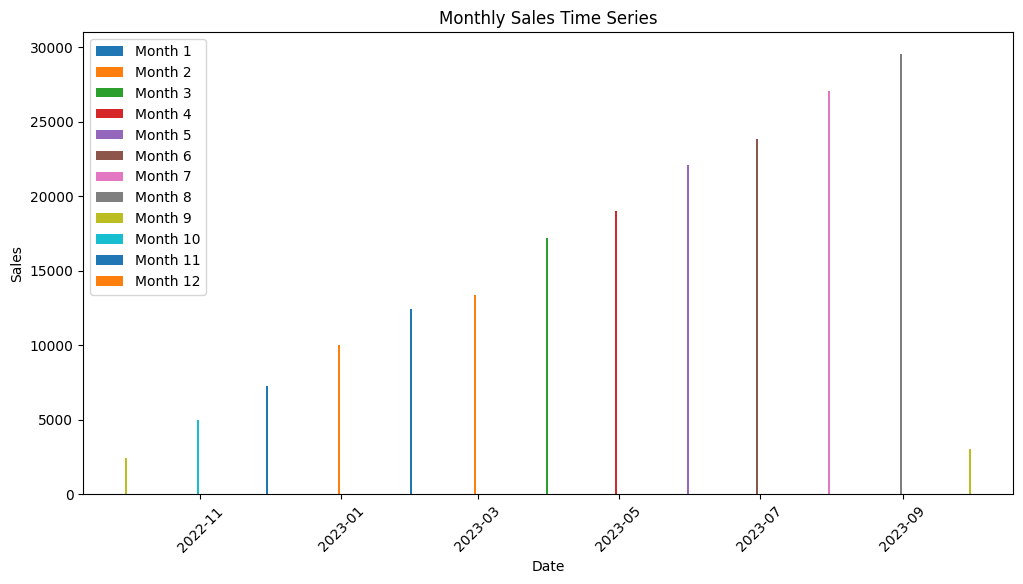

In [1994]:
import matplotlib.dates as mdates


# Visualizar la serie temporal mensual
plt.figure(figsize=(12, 6))
for month, group in grouped:
    plt.bar(group.index, group['sales'], label=f'Month {month}')

plt.title('Monthly Sales Time Series')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.xticks(rotation=45)
plt.show()

In [1995]:
monthly_sales = pd.DataFrame(columns=['Date', 'Sales'])

for month, group in grouped:
    month_sales = group['sales'].sum()  # Sumar las ventas del mes
    date = group.index[0]  # Tomar la fecha del primer día del mes
    monthly_sales.loc[len(monthly_sales)] = [date, month_sales]

# Ordenar el DataFrame por fecha
monthly_sales = monthly_sales.sort_values(by='Date').reset_index(drop=True)

monthly_sales

,Date,Sales
0,2022-09-30,5408.333697
1,2022-10-31,5003.489725
2,2022-11-30,7222.754628
3,2022-12-31,9990.371237
4,2023-01-31,12450.943431
5,2023-02-28,13382.318990
6,2023-03-31,17193.872156
7,2023-04-30,19022.469124
8,2023-05-31,22098.498281
9,2023-06-30,23805.151814


In [1996]:
monthly_sales['Date'] = pd.to_datetime(monthly_sales['Date'])

monthly_sales.set_index('Date', inplace=True)

In [1997]:
group.value_counts()

sales      
9990.371237    1
Name: count, dtype: int64

In [1998]:
# Interpolar los valores faltantes en la serie temporal
monthly_sales_interpolated = monthly_sales.interpolate(method='linear')
tensor = monthly_sales.shape
tendencia = monthly_sales_interpolated['Sales'].ewm(span=12, adjust=False).mean()
# Descomposición de la serie temporal interpolada
result = seasonal_decompose(monthly_sales_interpolated['Sales'], model='additive', period=6)

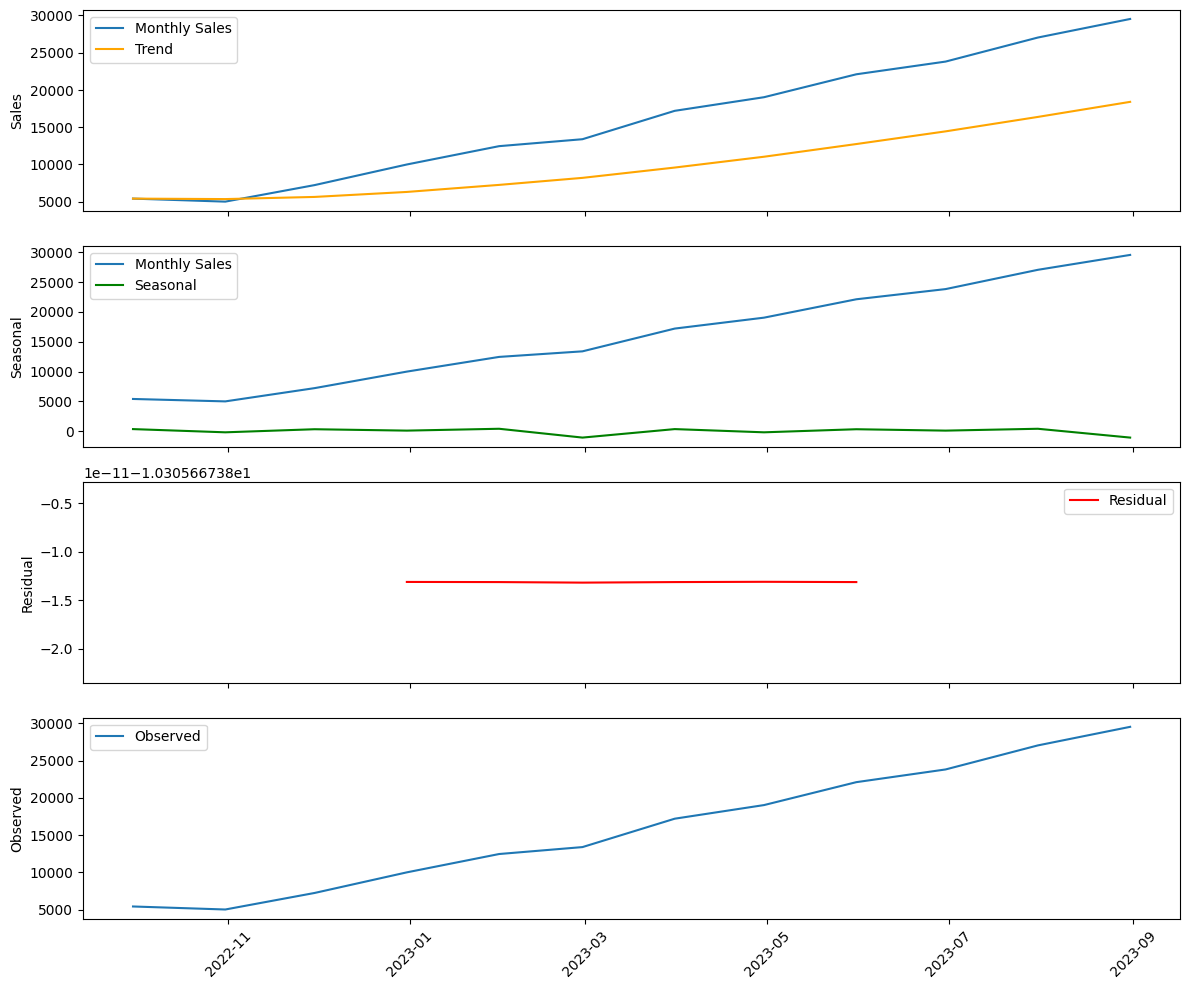

In [1999]:
fig, axes = plt.subplots(4, 1, figsize=(12, 10), sharex=True)

# Graficar cada componente junto con las ventas mensuales
axes[0].plot(monthly_sales_interpolated.index, monthly_sales_interpolated['Sales'], label='Monthly Sales')
axes[0].plot(tendencia.index, tendencia, label='Trend', color='orange')
axes[0].set_ylabel('Sales')
axes[0].legend()

axes[1].plot(monthly_sales_interpolated.index, monthly_sales_interpolated['Sales'], label='Monthly Sales')
axes[1].plot(result.seasonal.index, result.seasonal, label='Seasonal', color='green')
axes[1].set_ylabel('Seasonal')
axes[1].legend()

axes[2].plot(result.resid.index, result.resid, label='Residual', color='red')
axes[2].set_ylabel('Residual')
axes[2].legend()

axes[3].plot(result.observed.index, result.observed, label='Observed')
axes[3].set_ylabel('Observed')
axes[3].legend()

# Rotar las etiquetas del eje x para que no se superpongan
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

In [2000]:
from statsmodels.tsa.stattools import adfuller

def test_stationarity(timeseries):
    print("Dickey-Fuller test results:")
    dftest = adfuller(timeseries, autolag = "AIC")
    dfoutput = pd.Series(dftest[0:4], index = ["Test Statistic", "p-value", "#Lags Used", "Number of Observations Used"])
    for key,value in dftest[4].items():
        dfoutput["Critical Value (%s)"%key] = value
    return dfoutput

test_stationarity(monthly_sales_interpolated)

Dickey-Fuller test results:


Test Statistic                 3.187134
p-value                        1.000000
#Lags Used                     3.000000
Number of Observations Used    8.000000
Critical Value (1%)           -4.665186
Critical Value (5%)           -3.367187
Critical Value (10%)          -2.802961
dtype: float64

In [2001]:
# Responder a las preguntas

print(f"Tensor de la serie temporal: {tensor}")
print(f"Tendencia: {tendencia}")

Tensor de la serie temporal: (12, 1)
Tendencia: Date
2022-09-30     5408.333697
2022-10-31     5346.050009
2022-11-30     5634.773796
2022-12-31     6304.865710
2023-01-31     7250.416129
2023-02-28     8193.785800
2023-03-31     9578.414470
2023-04-30    11031.345955
2023-05-31    12733.984774
2023-06-30    14437.241242
2023-07-31    16375.037988
2023-08-31    18398.215081
Name: Sales, dtype: float64


In [2002]:
adf_result = test_stationarity(monthly_sales_interpolated['Sales'])

# ¿Es estacionaria?
if adf_result['p-value'] < 0.05:
    print("La serie temporal es estacionaria")
else:
    print("La serie temporal no es estacionaria")



Dickey-Fuller test results:
La serie temporal no es estacionaria


In [2003]:
# Variabilidad o ruido
variabilidad_ruido = result.resid.dropna()
print(f"Variabilidad o ruido: {variabilidad_ruido.describe()}")

Variabilidad o ruido: count    6.000000e+00
mean    -1.030567e+01
std      2.901504e-14
min     -1.030567e+01
25%     -1.030567e+01
50%     -1.030567e+01
75%     -1.030567e+01
max     -1.030567e+01
Name: resid, dtype: float64


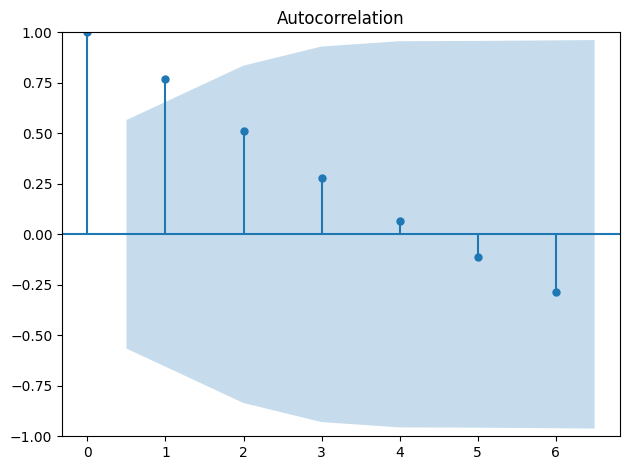

In [2004]:
from statsmodels.graphics.tsaplots import plot_acf

plot_acf(monthly_sales_interpolated['Sales'])

plt.tight_layout()

plt.show()

In [2005]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Ajustar el modelo de suavizado exponencial simple sin valores iniciales proporcionados
modelo_suavizado = ExponentialSmoothing(monthly_sales_interpolated['Sales'], 
                                         seasonal_periods=6, 
                                         trend='add', 
                                         seasonal='add').fit(remove_bias=True)

# Obtener las predicciones futuras
predicciones = modelo_suavizado.forecast(steps=12)


/home/vscode/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
/home/vscode/.local/lib/python3.10/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


In [2006]:
print(predicciones)

2023-09-30    27342.192912
2023-10-31    25217.342290
2023-11-30    27371.550345
2023-12-31    29278.939766
2024-01-31    31826.797519
2024-02-29    30339.678656
2024-03-31    26724.474735
2024-04-30    24599.624114
2024-05-31    26753.832168
2024-06-30    28661.221589
2024-07-31    31209.079342
2024-08-31    29721.960479
Freq: ME, dtype: float64


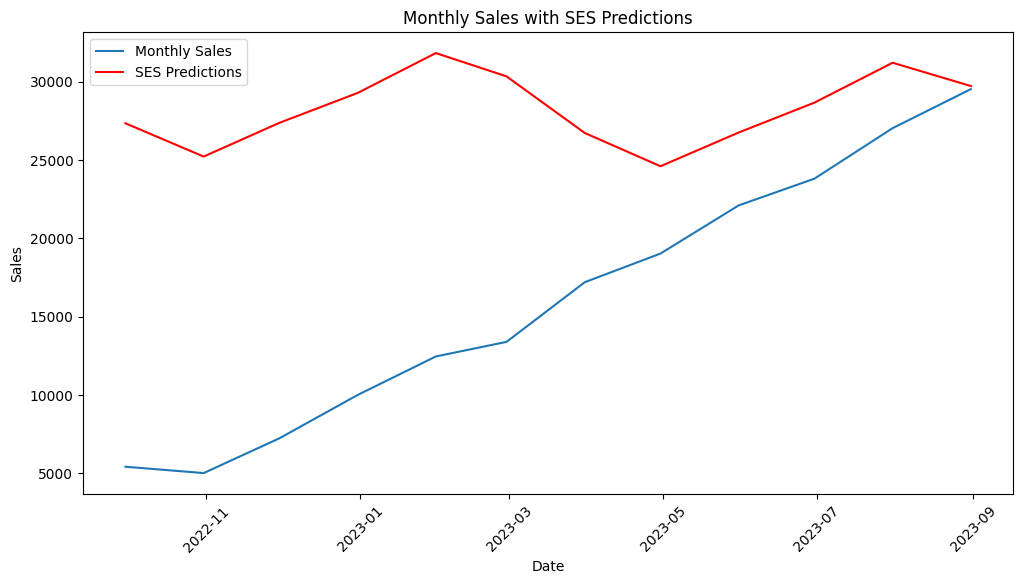

In [2008]:
# Visualizamos los datos originales y las predicciones
plt.figure(figsize=(12, 6))
plt.plot(monthly_sales_interpolated.index, monthly_sales_interpolated['Sales'], label='Monthly Sales')
plt.plot(monthly_sales_interpolated.index, predicciones, label='SES Predictions', color='red')
plt.title('Monthly Sales with SES Predictions')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.xticks(rotation=45)
plt.show()